# Read in obs data
- so far this notebok reads in csv files of daily station data from 5 stations and stores it in a pandas dataframe
- the five stations are: Adelaide, Eversleigh, Sydney, Melbourne, Cape Otway 
- Then it saves Tmax, Tmin and Date from each station as a netcdf
- Then read the netcdfs for each station back in, select the dates they all run for (1878-1920) and save as one combined netcdf (called Daily_T_Aus_5S)
- I should make a map with the five station locations shown

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import xarray as xr
import os
import numpy as np

## Read in all 5 datasets

In [2]:
zf_Melb = zipfile.ZipFile('IDCJAC0010_086071_1800.zip') 
df_Melb = pd.read_csv(zf_Melb.open('IDCJAC0010_086071_1800_Data.csv'))
df_Melb

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,86071,1855,1,1,NaN,NaN,NaN
1,IDCJAC0010,86071,1855,1,2,NaN,NaN,NaN
2,IDCJAC0010,86071,1855,1,3,NaN,NaN,NaN
3,IDCJAC0010,86071,1855,1,4,NaN,NaN,NaN
4,IDCJAC0010,86071,1855,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58439,IDCJAC0010,86071,2015,1,1,27.3,1.0,Y
58440,IDCJAC0010,86071,2015,1,2,39.4,1.0,Y
58441,IDCJAC0010,86071,2015,1,3,38.4,1.0,Y
58442,IDCJAC0010,86071,2015,1,4,23.9,1.0,Y


In [3]:
zf_COtway = zipfile.ZipFile('IDCJAC0010_090015_1800.zip') 
df_COtway = pd.read_csv(zf_COtway.open('IDCJAC0010_090015_1800_Data.csv'))
df_COtway

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,90015,1864,1,1,NaN,NaN,NaN
1,IDCJAC0010,90015,1864,1,2,NaN,NaN,NaN
2,IDCJAC0010,90015,1864,1,3,NaN,NaN,NaN
3,IDCJAC0010,90015,1864,1,4,NaN,NaN,NaN
4,IDCJAC0010,90015,1864,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57524,IDCJAC0010,90015,2021,6,30,16.8,1.0,N
57525,IDCJAC0010,90015,2021,7,1,15.2,1.0,N
57526,IDCJAC0010,90015,2021,7,2,15.1,1.0,N
57527,IDCJAC0010,90015,2021,7,3,11.1,1.0,N


In [4]:
zf_Syd = zipfile.ZipFile('IDCJAC0010_066062_1800.zip') 
df_Syd = pd.read_csv(zf_Syd.open('IDCJAC0010_066062_1800_Data.csv'))
df_Syd

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y
...,...,...,...,...,...,...,...,...
59042,IDCJAC0010,66062,2020,8,26,19.6,1.0,Y
59043,IDCJAC0010,66062,2020,8,27,22.2,1.0,Y
59044,IDCJAC0010,66062,2020,8,28,19.7,1.0,Y
59045,IDCJAC0010,66062,2020,8,29,21.5,1.0,Y


In [5]:
# read csv file into pandas dataframe
df_Adel = pd.read_csv('allAdelaidedata_030420.csv')
df_Adel['Date'] = pd.to_datetime(df_Adel['Date'])#, format='%Y%m%d')
df_Adel

,Date,Tmax,Tmin,d23000origTmax,d23000origTmin,d23000adjTmax,d23000adjTmin,gorigTmax,gorigTmin,gadjTmax,gadjTmin,d23090Tmax,d23090Tmin
0,1856-11-02,27.5,15.8,NaN,NaN,NaN,NaN,28.1,16.2,27.5,15.8,NaN,NaN
1,1856-11-03,23.4,11.2,NaN,NaN,NaN,NaN,23.9,11.6,23.4,11.2,NaN,NaN
2,1856-11-04,16.9,9.9,NaN,NaN,NaN,NaN,17.3,10.3,16.9,9.9,NaN,NaN
3,1856-11-05,17.9,6.2,NaN,NaN,NaN,NaN,18.3,7.2,17.9,6.2,NaN,NaN
4,1856-11-06,22.1,6.3,NaN,NaN,NaN,NaN,22.8,7.3,22.1,6.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59344,2019-04-26,18.4,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.4,15.0
59345,2019-04-27,19.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,10.2
59346,2019-04-28,19.1,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.1,11.7
59347,2019-04-29,24.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.5,8.3


In [6]:
# read csv file into pandas dataframe
df_Eversleigh = pd.read_csv('Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv', delimiter=';')
# reman max and min temperature to Tmax and Tmin
df_Ever = df_Eversleigh.rename(columns = {"Minimum.Temp..C.": "Tmin", "Maximum.Temp..C.": "Tmax"})
# convert dates to datetime object
df_Ever['Date'] = pd.to_datetime(df_Ever['Date'])#, format='%Y%m%d')
df_Ever

,Date,Day,Month,Year,Attached.Thermometer..C.,Sea.Level.Pressure..hPa.,Dry.Bulb.Temp..C.,Wet.Bulb.Temp..C.,Tmax,Tmin,Wind.direction..degrees.,Wind.Speed..ms.,Cloud.Cover..10ths.,Rainfall..mm.,Corrected.pressure..hPa.,Station.Level.Pressure..hPa.,Dew.Point.Temp..C.,Relative.Humidity....,Remarks
0,1877-01-01,1,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
1,1877-01-02,2,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
2,1877-01-03,3,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
3,1877-01-04,4,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
4,1877-01-05,5,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,1922-06-26,26,6,1922,11.7,1019.57,8.3,7.8,17.8,3.3,0.0,0.0,5.0,0.0,-99999.9,903.2,7.38,94.0,??? Cloudy rain in aft
16612,1922-06-27,27,6,1922,11.7,1015.39,10.6,8.9,13.3,5.6,270.0,2.6,2.0,13.2,-99999.9,899.5,7.52,81.0,-99999.9
16613,1922-06-28,28,6,1922,10.0,1010.54,7.5,6.1,12.2,5.3,225.0,2.6,-99999.9,0.0,-99999.9,894.8,4.77,83.0,Cloudy
16614,1922-06-29,29,6,1922,7.2,1009.27,3.3,2.8,3.3,1.7,270.0,1.0,1.0,3.0,-99999.9,893.0,2.23,93.0,Rain with light sleet during day


In [7]:
df_Ever

,Date,Day,Month,Year,Attached.Thermometer..C.,Sea.Level.Pressure..hPa.,Dry.Bulb.Temp..C.,Wet.Bulb.Temp..C.,Tmax,Tmin,Wind.direction..degrees.,Wind.Speed..ms.,Cloud.Cover..10ths.,Rainfall..mm.,Corrected.pressure..hPa.,Station.Level.Pressure..hPa.,Dew.Point.Temp..C.,Relative.Humidity....,Remarks
0,1877-01-01,1,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
1,1877-01-02,2,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
2,1877-01-03,3,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
3,1877-01-04,4,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
4,1877-01-05,5,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,1922-06-26,26,6,1922,11.7,1019.57,8.3,7.8,17.8,3.3,0.0,0.0,5.0,0.0,-99999.9,903.2,7.38,94.0,??? Cloudy rain in aft
16612,1922-06-27,27,6,1922,11.7,1015.39,10.6,8.9,13.3,5.6,270.0,2.6,2.0,13.2,-99999.9,899.5,7.52,81.0,-99999.9
16613,1922-06-28,28,6,1922,10.0,1010.54,7.5,6.1,12.2,5.3,225.0,2.6,-99999.9,0.0,-99999.9,894.8,4.77,83.0,Cloudy
16614,1922-06-29,29,6,1922,7.2,1009.27,3.3,2.8,3.3,1.7,270.0,1.0,1.0,3.0,-99999.9,893.0,2.23,93.0,Rain with light sleet during day


In [8]:
# allows you to look at data file without reading it in as a pandas df so you can see any issues with the csv
with open('Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['Date;Day;Month;Year;Attached.Thermometer..C.;Sea.Level.Pressure..hPa.;Dry.Bulb.Temp..C.;Wet.Bulb.Temp..C.;Maximum.Temp..C.;Minimum.Temp..C.;Wind.direction..degrees.;Wind.Speed..ms.;Cloud.Cover..10ths.;Rainfall..mm.;Corrected.pressure..hPa.;Station.Level.Pressure..hPa.;Dew.Point.Temp..C.;Relative.Humidity....;Remarks']
['1877-01-01;1;1;1877;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9']
['1877-01-02;2;1;1877;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9']
['1877-01-03;3;1;1877;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9']
['1877-01-04;4;1;1877;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9']
['1877-01-05;5;1;1877;-99999.9;-99999.9;-9

['1881-01-18;18;1;1881;21.1;1012.46;22.9;18.9;31.6;14.8;270;2.6;4;0;-99999.9;899;17.03;70;Fine much cloud. Thunder at 6 pm with little rain.']
['1881-01-19;19;1;1881;21.1;1015.73;23.8;19.6;33.4;13.9;270;2.6;0;0.5;-99999.9;901.9;17.7;69;Fine and clear. Hot.']
['1881-01-20;20;1;1881;23.9;1014.4;26;20.8;33.6;18.3;315;2.6;0;0;-99999.9;901.3;18.58;64;do ... do ... do']
['1881-01-21;21;1;1881;25;1013.24;26.6;21.1;33.4;18.1;315;1;0;0;-99999.9;900.5;18.78;62;Hot forenoon. Tstorm with heavy rain at 4 pm from SE. Thunder.']
['1881-01-22;22;1;1881;19.4;1011.86;20.4;16.6;35;14.8;270;2.6;10;26.7;-99999.9;898.1;14.58;69;Weather clearing. Fine. Lightning seen at night.']
['1881-01-23;23;1;1881;18.3;1011.45;18.7;17.4;28.4;15.7;0;0;9;22.9;-99999.9;897.5;16.76;89;Thundering all day - raining all aft.']
['1881-01-24;24;1;1881;18.3;1012.24;20.3;17.6;24.2;12.2;315;2.6;6;14.7;-99999.9;898.2;16.27;78;Fine. Much cumulus. Tstorm on all south after sunset coming up.']
['1881-01-25;25;1;1881;18.3;1011;19.4;17.6;

['1884-11-14;14;11;1884;17.8;1018.56;18.9;13.9;27.1;9.4;90;1;0;0.8;-99999.9;903.7;10.68;59;Fine']
['1884-11-15;15;11;1884;17.8;1018.45;19.4;13.9;27.1;6;315;1;0;0;-99999.9;903.6;10.33;56;do']
['1884-11-16;16;11;1884;17.2;1014.77;16.2;12.8;27.5;11.2;315;6.7;10;0;-99999.9;900.2;10.54;69;Gale all day. Rain after sunset 3 hours']
['1884-11-17;17;11;1884;13.3;1016.1;13.9;11.4;22.1;6.1;90;2.6;2;15;-99999.9;900.5;9.63;75;Fine']
['1884-11-18;18;11;1884;13.9;1017.18;14;10.3;21.8;5.8;90;6.7;1;0;-99999.9;901.6;7.41;64;do']
['1884-11-19;19;11;1884;15;1015.55;15.6;12;22.4;6;90;1;0;0;-99999.9;900.4;9.48;67;Fine']
['1884-11-20;20;11;1884;16.1;1016.06;18.3;13.8;24.7;6.9;0;0;1;0;-99999.9;901.1;10.92;62;do']
['1884-11-21;21;11;1884;18.3;1015.51;20;14;32.9;9;315;1;0;0;-99999.9;901.1;10.1;53;do']
['1884-11-22;22;11;1884;19.4;1011.29;20.6;15;26.1;13.7;315;6.7;0;0;-99999.9;897.6;11.62;56;Thunderin aft with light rain and at night']
['1884-11-23;23;11;1884;17.2;1011.72;16.5;14.8;26.8;11.8;90;2.6;8;4.8;-99999.

['1888-06-11;11;6;1888;11.1;1012.27;10.1;7.2;14.9;5.6;270;2.6;0;0;-99999.9;896.6;4.51;68;do and clear']
['1888-06-12;12;6;1888;9.4;1015.44;7.8;5;14.1;-2.8;270;2.6;2;0;-99999.9;899;1.99;67;do']
['1888-06-13;13;6;1888;7.2;1018.87;5.4;2.3;11.8;-6.1;0;0;0;0;-99999.9;901.5;-1.78;60;do']
['1888-06-14;14;6;1888;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;-99999.9;270;1;0;0;-99999.9;-99999.9;-99999.9;-99999.9;do']
['1888-06-15;15;6;1888;8.3;1020.71;6.4;5.3;13.1;-4.3;0;0;0;0;-99999.9;903.4;4.2;86;do']
['1888-06-16;16;6;1888;10;1022.06;9.4;7.5;16.1;-1.4;270;1;1;0;-99999.9;905;5.8;78;do']
['1888-06-17;17;6;1888;10.6;1021.44;9.9;8.3;15.6;-1.8;270;1;0;0;-99999.9;904.6;6.95;82;do']
['1888-06-18;18;6;1888;14.4;1015.36;12.2;10.6;16.4;1.6;315;2.6;2;0;-99999.9;900.1;9.43;83;Cloudy', ' shwr at midday', ' heavy rain at night']
['1888-06-19;19;6;1888;13.9;1007.59;11.7;10.6;15;8.1;315;6.7;4;20.6;-99999.9;893.1;9.81;88;Cloudy', ' shwr in aft']
['1888-06-20;20;6;1888;6.7;1011.89;4.4;1.7;12.2;-1;270;6.7;0;0.8

['1892-09-04;4;9;1892;13.9;1010.07;9.3;7.8;11.7;4.9;270;1;2;10.2;-99999.9;895.3;6.51;83;Fine']
['1892-09-05;5;9;1892;11.7;1008.39;12.2;8.1;15.3;-0.2;315;1;8;0;-99999.9;893.3;4.39;59;light rain from NW followed by gales 4 p.m.']
['1892-09-06;6;9;1892;13.3;1007.3;11.3;8.9;13.3;8.2;270;2.6;2;15;-99999.9;892.7;6.94;74;Fine. Strong gale']
['1892-09-07;7;9;1892;10;1009.52;9.4;7.2;14.9;5;270;6.7;4;0;-99999.9;893.9;5.2;75;Cloudy']
['1892-09-08;8;9;1892;11.1;1015.66;9.2;7.6;13.9;1.1;90;2.6;5;0;-99999.9;899.6;6.2;81;Fine.']
['1892-09-09;9;9;1892;12.2;1015.6;10.9;9.4;15.5;2.7;0;0;2;0;-99999.9;899.8;8.23;84;Cloudy']
['1892-09-10;10;9;1892;13.9;1015.38;10.7;8.9;16.7;6.7;90;1;10;0.3;-99999.9;900;7.44;80;Fine Thunder to N. in aft.']
['1892-09-11;11;9;1892;13.9;1014.7;10.7;8.3;15.1;5;90;1;5;0;-99999.9;899.4;6.24;74;rain in aft.']
['1892-09-12;12;9;1892;13.3;1014.63;11.1;9.5;16.5;6.5;0;0;7;14;-99999.9;899.2;8.25;83;Showery']
['1892-09-13;13;9;1892;12.8;1017.13;11.1;9.3;15.4;5.5;90;2.6;4;5.1;-99999.9;90

['1898-10-15;15;10;1898;20;1014.3;20.8;14;28.3;11.3;225;1;0;0;-99999.9;900.4;9.51;48;do']
['1898-10-16;16;10;1898;18.9;1017.16;21.1;13.4;28.3;3.4;0;0;0;0;-99999.9;902.7;7.98;43;do and clear']
['1898-10-17;17;10;1898;20.6;1015.51;21.7;16.1;30.2;8.7;315;2.6;1;0;-99999.9;901.6;12.93;57;do', ' cirrus forming in forenoon']
['1898-10-18;18;10;1898;22.2;1015.47;23.9;16.4;30.1;12.8;270;1;0;0;-99999.9;901.9;12.08;48;do and clear']
['1898-10-19;19;10;1898;21.7;1011.31;22.8;15.6;33.3;12.6;315;6.7;0;0;-99999.9;898.1;11.29;48;Fine and clear']
['1898-10-20;20;10;1898;21.1;1009.54;22;13.9;31.4;12.6;315;1;2;0;-99999.9;896.4;8.39;42;???']
['1898-10-21;21;10;1898;17.8;1009.54;18.2;13.3;31.3;9.5;45;2.6;5;0;-99999.9;895.7;10.06;59;Cloudy shower in aft from NW']
['1898-10-22;22;10;1898;15;1007.2;13.1;10.8;23.3;7.3;270;1;9;9.1;-99999.9;893;9.13;77;Thunder in forenoon with showers']
['1898-10-23;23;10;1898;13.9;1010.19;13.1;8.8;18.4;1.5;270;1;0;2.8;-99999.9;895.4;5.06;58;Fine and clear']
['1898-10-24;24;10;1

['1904-10-16;16;10;1904;17.2;1008.9;18.1;14.7;21.4;7.1;270;4.6;2;0;-99999.9;895;12.7;71;Fine']
['1904-10-17;17;10;1904;18.3;1008.52;19.6;14.7;23.8;7.6;270;4.6;0;0;-99999.9;894.9;11.74;60;Fine']
['1904-10-18;18;10;1904;20.6;1012.25;22.4;16.9;26.2;11.3;270;6.7;0;0;-99999.9;898.7;13.95;59;Fine']
['1904-10-19;19;10;1904;21.1;1011.79;22.8;17.7;25;13.9;270;12.3;4;0;-99999.9;898.4;15.1;62;Cloudy. Strong Westerly wind. Thunder and rain almost 5am']
['1904-10-20;20;10;1904;17.8;1010.11;18;15.4;21.9;14.6;270;6.7;10;6.3;-99999.9;896.2;13.95;77;Fine']
['1904-10-21;21;10;1904;16.1;1011.88;17.3;12.1;21.6;5.2;225;4.6;0;0;-99999.9;897.4;8.36;56;Fine and clear']
['1904-10-22;22;10;1904;15.6;1010.09;17.2;11;18.9;5.1;225;4.6;3;0;-99999.9;895.7;6.1;48;Fine']
['1904-10-23;23;10;1904;12.8;1014.08;12.7;8.6;17.8;1.1;270;1;0;0;-99999.9;898.6;4.99;59;Fine']
['1904-10-24;24;10;1904;13.9;1016.96;13.9;10.6;18.8;3.3;135;4.6;2;0;-99999.9;901.4;8.09;68;Fine']
['1904-10-25;25;10;1904;12.2;1018.42;12.4;8.9;20.5;2.8;90;

['1910-11-08;8;11;1910;16.7;1017.37;18.1;15.1;23.8;9.4;0;0;4;0;-99999.9;902.4;13.37;74;do much heavy cumulus']
['1910-11-09;9;11;1910;16.1;1019.89;16.7;12.1;23.8;7.9;90;2.6;1;0;-99999.9;904.5;8.81;60;do NE gale at night']
['1910-11-10;10;11;1910;16.7;1017.48;17.2;13.8;23.9;6.8;45;4.6;1;0;-99999.9;902.5;11.67;70;do much cloud - light showers in early mg.']
['1910-11-11;11;11;1910;16.1;1012.9;17.7;15.9;23.8;8.9;90;1;6;1.5;-99999.9;898.3;14.93;84;Cloudy with small light showers']
['1910-11-12;12;11;1910;15;1007.43;14.9;13.1;19.2;11.1;270;1;10;13;-99999.9;893.2;11.97;83;Fine - much cloud', ' but clearing']
['1910-11-13;13;11;1910;14.4;1010.62;15.6;12.3;21;2.3;0;0;3;0;-99999.9;895.9;10.06;70;do']
['1910-11-14;14;11;1910;16.1;1013.58;17.2;13.3;21.4;8.5;0;0;4;0;-99999.9;898.9;10.77;66;much heavy cumulus - 2 hours light rain at sunset']
['1910-11-15;15;11;1910;14.4;1019.31;13.9;12.2;22.2;9.2;45;2.6;10;3.6;-99999.9;903.6;11.06;83;heavy cloud from NE all forenoon - cleared in aft.']
['1910-11-16

['1916-12-14;14;12;1916;14.4;1003.86;12.4;9.9;16.6;8.2;225;4.6;7;12.7;-99999.9;889.9;7.98;74;Fine – clearing and cold']
['1916-12-15;15;12;1916;18.3;1015.51;15.9;12.5;22.6;5.2;90;1;1;0;-99999.9;901.1;10.2;69;do']
['1916-12-16;16;12;1916;18.3;1019.9;15.1;11.3;23.7;8.8;90;2.6;1;0;-99999.9;905;8.49;65;do and clear']
['1916-12-17;17;12;1916;18.9;1017.39;16.8;8.3;25.7;15.2;90;1;0;0;-99999.9;902.9;-0.63;30;do do']
['1916-12-18;18;12;1916;19.4;1014.11;20;15.4;27.7;8.2;270;1;0;0;-99999.9;900.1;12.73;63;do heavy showers with little Thunder in aft.']
['1916-12-19;19;12;1916;22.2;1012.43;21.3;15.7;30.1;10.8;90;2.6;0;4.3;-99999.9;899.2;12.46;57;do and clear']
['1916-12-20;20;12;1916;22.2;1011.42;23.6;16.2;30.5;10.8;0;0;0;0;-99999.9;898.3;11.92;48;do with cumulus']
['1916-12-21;21;12;1916;23.3;1008.91;23.7;17.5;28.8;13.6;270;1;0;0;-99999.9;896.3;14.26;55;do do']
['1916-12-22;22;12;1916;23.3;1007.67;23.7;18.6;28.8;13.3;270;1;0;0;-99999.9;895.2;16.15;63;do do Tstorm on S. in aft. Little Thunder and r

## Convert datasets to nice consistent format
column for date (as datetime object), Tmax and also Tmin if tehre is data for it

In [9]:
# # USE THIS TO CHECK AND MODIFY BELOW FUNCTION
# # select out the columns needed
# T_Melb = df_Melb[["Year", "Month", "Day", "Maximum temperature (Degree C)"]]
# # rename the max temp column to Tmax
# T_Melb = T_Melb.rename(columns = {"Maximum temperature (Degree C)": "Tmax"})
# print(T_Melb)
# # Convert year, month, day columns to a single datetime object in one column
# T_Melb['dateInt']=T_Melb['Year'].astype(str) + T_Melb['Month'].astype(str).str.zfill(2)+ T_Melb['Day'].astype(str).str.zfill(2)
# T_Melb['Date'] = pd.to_datetime(T_Melb['dateInt'], format='%Y%m%d')
# # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
# T_Melb = T_Melb.drop(['dateInt', "Year", "Month", "Day"], axis=1)
# T_Melb

In [10]:
# function to select out the relevant data and rename it so we have date and Tmax
def convert_df_Tmax(df):
    # select out the columns needed
    df_sel = df[["Year", "Month", "Day", "Maximum temperature (Degree C)"]]
    # rename the max temp column to Tmax
    df_T = df_sel.rename(columns = {"Maximum temperature (Degree C)": "Tmax"})
    # Convert year, month, day columns to a single datetime object in one column
    df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
    df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
    # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
    df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
    # reorder the df so date is in the first column
    df_TD_final = df_T[["Date", "Tmax"]]
    # set the date as teh index column
    df_TD_final = df_TD_final.set_index(['Date'])
    
    return df_TD_final

In [11]:
T_Adel = df_Adel[["Date", "Tmin", "Tmax"]].set_index(['Date'])
T_Adel

,Tmin,Tmax
Date,,
1856-11-02,15.8,27.5
1856-11-03,11.2,23.4
1856-11-04,9.9,16.9
1856-11-05,6.2,17.9
1856-11-06,6.3,22.1
...,...,...
2019-04-26,15.0,18.4
2019-04-27,10.2,19.0
2019-04-28,11.7,19.1


In [12]:
T_Ever = df_Ever[["Date", "Tmin", "Tmax"]].set_index(['Date'])
# find where the array value is set to -9999.9 (ie wrong values)
ever_wrong = T_Ever<-100
# set these cells to NaN
T_Ever[ever_wrong] = None
T_Ever

,Tmin,Tmax
Date,,
1877-01-01,NaN,NaN
1877-01-02,NaN,NaN
1877-01-03,NaN,NaN
1877-01-04,NaN,NaN
1877-01-05,NaN,NaN
...,...,...
1922-06-26,3.3,17.8
1922-06-27,5.6,13.3
1922-06-28,5.3,12.2


In [13]:
T_Melb = convert_df_Tmax(df_Melb)
T_Melb

,Tmax
Date,
1855-01-01,NaN
1855-01-02,NaN
1855-01-03,NaN
1855-01-04,NaN
1855-01-05,NaN
...,...
2015-01-01,27.3
2015-01-02,39.4
2015-01-03,38.4


In [14]:
T_Syd = convert_df_Tmax(df_Syd)
T_Syd

,Tmax
Date,
1859-01-01,24.4
1859-01-02,24.4
1859-01-03,24.2
1859-01-04,24.7
1859-01-05,24.6
...,...
2020-08-26,19.6
2020-08-27,22.2
2020-08-28,19.7


In [15]:
T_COtway = convert_df_Tmax(df_COtway)
T_COtway

,Tmax
Date,
1864-01-01,NaN
1864-01-02,NaN
1864-01-03,NaN
1864-01-04,NaN
1864-01-05,NaN
...,...
2021-06-30,16.8
2021-07-01,15.2
2021-07-02,15.1


<AxesSubplot:xlabel='Date'>

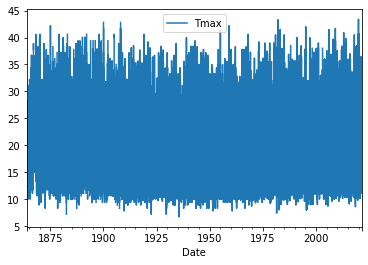

In [16]:
T_COtway.plot()

## Convert to xarray and save as netcdf

In [17]:
!ls /g/data/w48/kb6999/Observations/

allAdelaidedata_030420.csv
Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv
IDCJAC0010_066062_1800.zip
IDCJAC0010_086071_1800.zip
IDCJAC0010_090015_1800.zip
obs_netcdfs_T
O_read_in_daily_obs_2021.07.09.ipynb
O_timeseries_daily_Tmax_stacked.png
O_Time_series.ipynb


In [18]:
# define path to save netcdfs of daily obs
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [19]:
# Function that converts df to xarray and saves as netcdf
def to_xr_netcdf(df, station):
    df_to_xr = df.to_xarray()
    df_to_xr.to_netcdf(f'{path}{station}.nc')
    return

In [20]:
# call above function to save df for each station as a netcdf
to_xr_netcdf(T_Adel, 'Adelaide')
to_xr_netcdf(T_COtway, 'Cape_Otway')
to_xr_netcdf(T_Ever, 'Eversleigh')
to_xr_netcdf(T_Melb, 'Melbourne')
to_xr_netcdf(T_Syd, 'Sydney')

In [21]:
start_date = '1878-01-01'
end_date = '1920-12-31'

In [27]:
sorted(os.listdir(path))

['.ipynb_checkpoints',
 '.nfs020006839c01afa20000082d',
 '.nfs020006839c01afc200000830',
 'Adelaide.nc',
 'Cape_Otway.nc',
 'Eversleigh.nc',
 'Melbourne.nc',
 'Sydney.nc']

In [28]:
# remove weird files in the directory using [2:]
stations = sorted(os.listdir(path))[3:]
ds = []
station = []
for s in stations:
    d = xr.open_dataset(f'{path}/{s}')
    #chekc if dataset has Tmin and if not, add Tmin dimension
    if hasattr(d, 'Tmin'):
        print(s,'has Tmin')
    else:
        print(s,'does NOT have Tmin, so assign Tmin=NaN')
        d['Tmin'] = d.Tmax*np.NaN
    d = d.sel(Date=slice(f'{start_date}',f'{end_date}'))
    ds.append(d)
    station.append(s[:-3])

Adelaide.nc has Tmin
Cape_Otway.nc does NOT have Tmin, so assign Tmin=NaN
Eversleigh.nc has Tmin
Melbourne.nc does NOT have Tmin, so assign Tmin=NaN
Sydney.nc does NOT have Tmin, so assign Tmin=NaN


In [29]:
# concatenate all the stations into one xarray
obs = xr.concat(ds, dim='station', coords = 'minimal', compat='override')
obs.coords['station'] = station
# rename Date coord to time 
obs = obs.rename({'Date':'time'})
obs

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) <U10 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables:
    Tmin     (station, time) float64 10.7 13.1 13.9 14.8 ... nan nan nan nan
    Tmax     (station, time) float64 26.6 28.3 32.1 34.4 ... 30.3 26.3 31.0 27.7

In [31]:
# save the xarray of daily aus Tmin and Tmax from start date to end date from 5 stations as a netcdf 
obs.to_netcdf(f'{path}Daily_T_Aus_5S.nc')

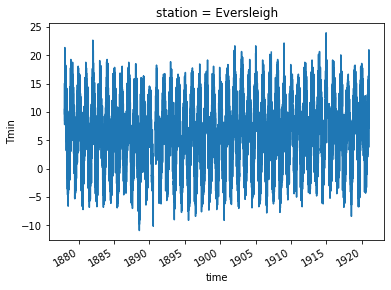

In [30]:
# check it plots right
obs.sel(station='Eversleigh').Tmin.plot()

## Date range
latest start date is 1887 so I propose starting at Jan 1878. 

earliest end date is 1922 at Eversleigh, so for now finish at 1920?? or else 1900 or 1888

In [ ]:
print(f"Adelaide: {T_Adel['Date'][0]} to {T_Adel['Date'].iloc[-1]}")
print(f"Cape Otway: {T_COtway['Date'][0]} to {T_COtway['Date'].iloc[-1]}")
print(f"Eversleigh: {T_Ever['Date'][0]} to {T_Ever['Date'].iloc[-1]}")
print(f"Melbourne: {T_Melb['Date'][0]} to {T_Melb['Date'].iloc[-1]}")
print(f"Sydney: {T_Syd['Date'][0]} to {T_Syd['Date'].iloc[-1]}")

In [ ]:
# select out date range
start_date = '1878-01-01'
end_date = '1920-12-31'
T_Adel_date = T_Adel.loc[start_date: end_date]
T_COtway_date = T_COtway.loc[start_date: end_date]
T_Ever_date = T_Ever.loc[start_date: end_date]
T_Melb_date = T_Melb.loc[start_date: end_date]
T_Syd_date = T_Syd.loc[start_date: end_date]